<a href="https://colab.research.google.com/github/OscarAliM/3_Valores_atipicos_Columnas/blob/main/3_Valores_atipicos_Columnas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [3]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('Inmuebles_sin_nulos.csv')

In [ ]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

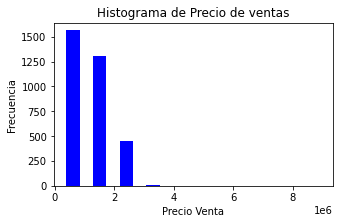

In [5]:
#Realizamos histograma de variables cuantitativas
fig = plt.figure(figsize =(5, 3))
plt.hist(x=data["Precio Venta"], color='blue', rwidth=0.50)
plt.title('Histograma de Precio de ventas')
plt.xlabel('Precio Venta')
plt.ylabel('Frecuencia')

plt.show() #dibujamos el histograma

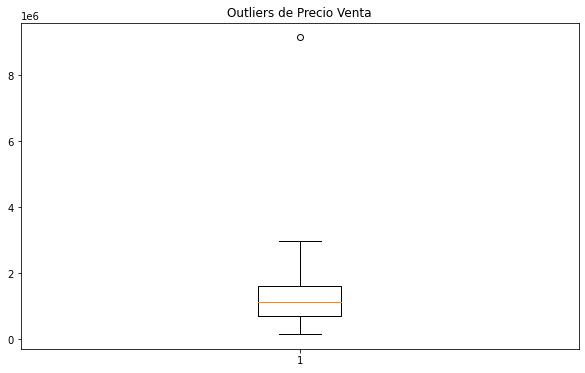

In [6]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(10, 6))
plt.boxplot(data["Precio Venta"]) 
plt.title("Outliers de Precio Venta")
plt.show() #dibujamos el diagrama

**Método de desviación estándar**

In [ ]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=data["Precio Venta"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

In [ ]:
#Encontramos Ouliers
outliers= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

In [ ]:
#Obtenemos datos limpios
data_clean= data[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data_clean

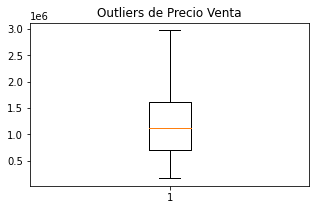

In [15]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean["Precio Venta"]) 
plt.title("Outliers de Precio Venta")
plt.show() #Dibujamos el diagrama

**MÉTODO DE IQR (RANGO INTER QUARTILICO)**

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data["Precio Venta"]

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

In [ ]:
#Encontramos Ouliers
outliers_iqr= data[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios
data_clean_iqr= data[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data_clean_iqr

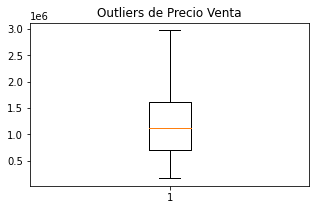

In [14]:
#Realizamos diagrama de caja o bigote
fig = plt.figure(figsize =(5, 3))
plt.boxplot(data_clean_iqr["Precio Venta"]) 
plt.title("Outliers de Precio Venta")
plt.show() #dibujamos el diagrama